# 🧠 Customer Segmentation using K-Means Clustering

Welcome to this simple machine learning project on **Customer Segmentation** using the **K-Means Clustering** algorithm!

In this notebook, we aim to group customers into different segments based on their purchasing behavior and demographic features. By understanding these segments, businesses can make more targeted marketing decisions and improve customer satisfaction.

## 🔍 Dataset
We'll be using the **Customer Segmentation Tutorial** dataset from Kaggle:  
[Customer Segmentation Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

This dataset contains customer details such as:
- Customer ID
- Age
- Gender
- Annual Income (k$)
- Spending Score (1–100)

## 🛠️ What we'll do:
- Load and explore the dataset
- Visualize key patterns in customer behavior
- Apply **K-Means Clustering** to segment customers
- Analyze and visualize the resulting clusters
---
Let's get started! 🚀


# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection and Analysis

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML Datasets/Mall_Customers.csv')
# df = pd.read_csv('/ML Datasets/Mall_Customers.csv')


In [4]:
# first 5 rows of the df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


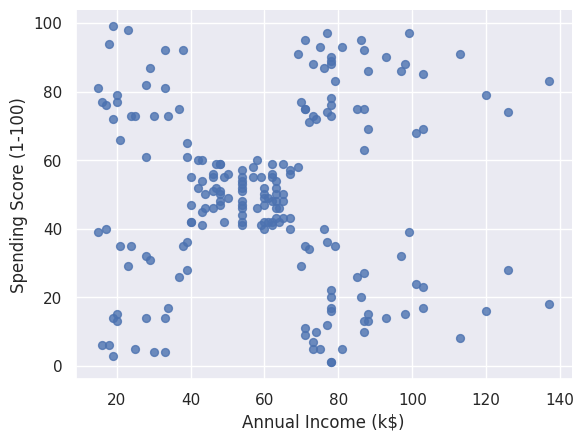

In [13]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for Missing value
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
# Finding the number of rows and columns
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Choosing the anual income and Spending Score Column**

In [9]:
X = df.iloc[:,[3,4]].values

## Choosing the number of cluster

**WCSS --> Within Cluster Sum of Squares**

In [10]:
# Finding wcss value for different number of cases
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


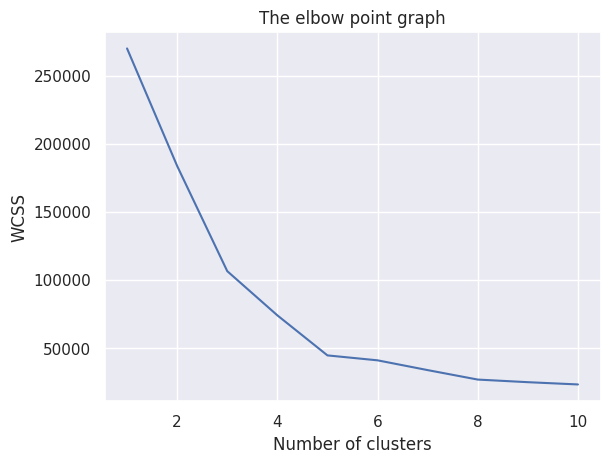

In [11]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The optimal number of cluster will be 5**

# Training the k-Means Clustering Model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# Visualizing all the cluster

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

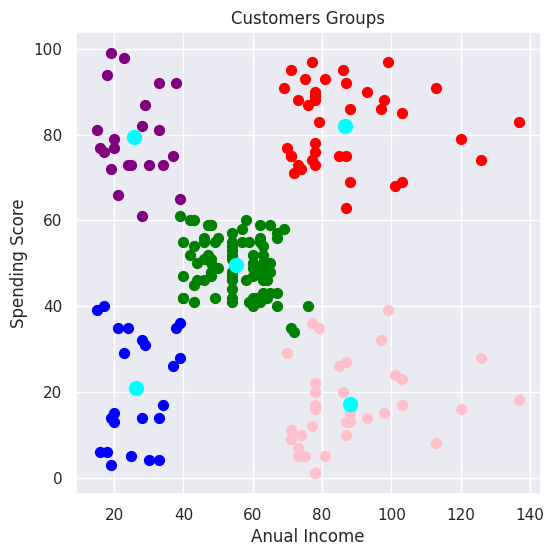

In [23]:
# Plotting all the clusters and their centroid
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='pink', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster5')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='cyan', label='centroids')

plt.title("Customers Groups")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
# plt.legend()
plt.show()



In [28]:
! git status

Refresh index: 100% (7/7), done.
On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	ML Datasets/Mall_Customers.csv
	Machine Learning-ipynb/Customer_Segmentation_using_K-Means_Clustering.ipynb

nothing added to commit but untracked files present (use "git add" to track)
